<a href="https://colab.research.google.com/github/ThanhTad/Lab_ML/blob/main/Lab_7_20130222_CaoThanhDat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [24]:
# code
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/lab2_ml'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/lab2_ml


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [4]:
#code
iris = load_iris()
X = iris.data
y = iris.target

model = SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(model, X, y, cv=5)
print(scores)

[0.96666667 1.         0.96666667 0.96666667 1.        ]


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [9]:
#code
X_new  = SelectKBest(f_classif, k=3).fit_transform(X, y)
model = RandomForestClassifier(n_estimators=10, random_state=42)
scores = cross_val_score(model, X_new, y, cv=5)
print(scores)


[0.96666667 0.96666667 0.9        0.86666667 1.        ]


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [16]:
# code
digits = load_digits()
X = digits.data
y = digits.target
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)
print(kmeans.cluster_centers_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 0.00000000e+00  2.23463687e-02  4.22905028e+00  1.31396648e+01
   1.12681564e+01  2.93854749e+00  3.35195531e-02 -5.55111512e-17
  -1.73472348e-18  8.82681564e-01  1.26201117e+01  1.33687151e+01
   1.14078212e+01  1.13687151e+01  9.60893855e-01  2.77555756e-17
  -8.67361738e-19  3.72625698e+00  1.42122905e+01  5.25139665e+00
   2.10614525e+00  1.21173184e+01  3.53072626e+00  1.04083409e-16
  -1.30104261e-18  5.29608939e+00  1.26424581e+01  2.03351955e+00
   2.29050279e-01  9.07821229e+00  6.47486034e+00 -2.60208521e-18
   0.00000000e+00  5.88268156e+00  1.14916201e+01  8.65921788e-01
   3.35195531e-02  8.81005587e+00  7.15083799e+00  0.00000000e+00
  -1.04083409e-17  3.51396648e+00  1.32849162e+01  1.65921788e+00
   1.49162011e+00  1.13519553e+01  5.84357542e+00 -1.04083409e-17
  -4.33680869e-18  8.04469274e-01  1.31117318e+01  9.96089385e+00
   1.03519553e+01  1.32960894e+01  2.47486034e+00  2.23463687e-02
  -6.50521303e-19  5.58659218e-03  4.19553073e+00  1.35865922e+01
   1.33407

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [20]:
# code
kmeans = KMeans(n_clusters=10, n_init = 'auto' , random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)

models = [kmeans, rf, nb, knn]

model_names = ['KMeans', 'RandomForest', 'NaiveBayes', 'KNN']

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

n_folds = 5


for model, model_name in zip(models, model_names):
    print('Model: ', model_name)
    for score in scoring:
        cv_scores = cross_val_score(model, X, y, cv=KFold(n_splits=n_folds, shuffle=True, random_state=42), scoring=score)
        print('\t', score, ': ', cv_scores.mean())



Model:  KMeans
	 accuracy :  0.12584803466419064
	 precision_macro :  0.120047179840577
	 recall_macro :  0.12844470337482683
	 f1_macro :  0.11921719455745668
Model:  RandomForest
	 accuracy :  0.9755122253172391
	 precision_macro :  0.9765869173478698
	 recall_macro :  0.9752692977449525
	 f1_macro :  0.9754623035499739
Model:  NaiveBayes
	 accuracy :  0.8391674404209223
	 precision_macro :  0.8671427100677832
	 recall_macro :  0.8393688818181151
	 f1_macro :  0.8406192154070992
Model:  KNN
	 accuracy :  0.9860832559579078
	 precision_macro :  0.9868801742525981
	 recall_macro :  0.9863150407107792
	 f1_macro :  0.9863859251657987


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:

# Supervised learning is better

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [22]:
digits = load_digits()
X = digits.data
y = digits.target
agg_clustering = AgglomerativeClustering(n_clusters=10).fit(X)
y_pred = agg_clustering.labels_
accuracy = accuracy_score(y, y_pred)
print('AgglomerativeClustering accuracy:', accuracy)

AgglomerativeClustering accuracy: 0.19365609348914858


#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





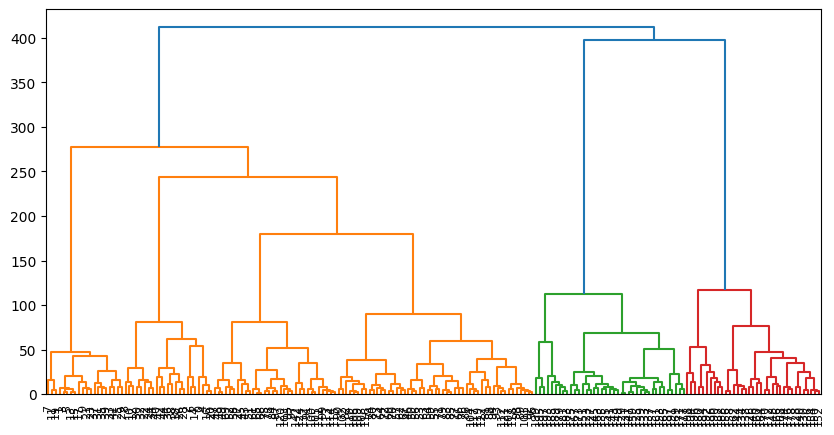

In [26]:
#code
df = pd.read_csv("shopping-data.csv")
df = df.drop(['CustomerID', 'Genre'], axis=1)
X = df.values
Z = linkage(X, 'ward')
plt.figure(figsize=(10, 5))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.show()

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

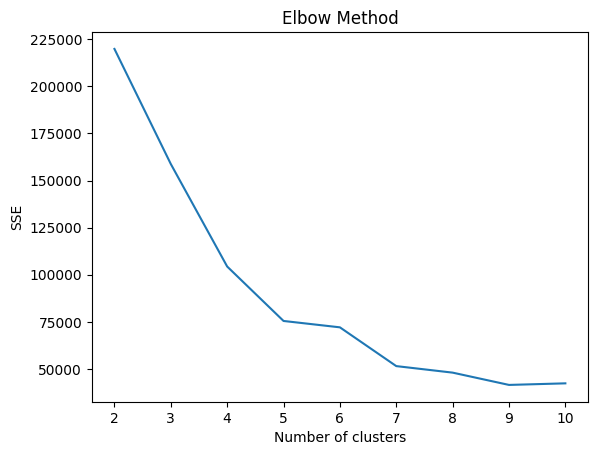

In [28]:
#code
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init = 'auto')
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [30]:
#code
agg_clustering = AgglomerativeClustering(n_clusters=5)
clusters = agg_clustering.fit_predict(df)
df['Cluster'] = clusters

# Print the number of samples in each cluster
print(df['Cluster'].value_counts())

0    83
2    39
1    35
4    23
3    20
Name: Cluster, dtype: int64


#Finally,
Save a copy in your Github. Remember renaming the notebook.